# DESIGNING THE FIR FILTER

### by Muhammad Arief Mulyana

## 1. Library that Used

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, group_delay

## Function that Used

## 2. Low Pass Filter Design


Filter Length (M) = 96
Passband Ripple = 0.039 dB
Stopband Attenuation = 52 dB


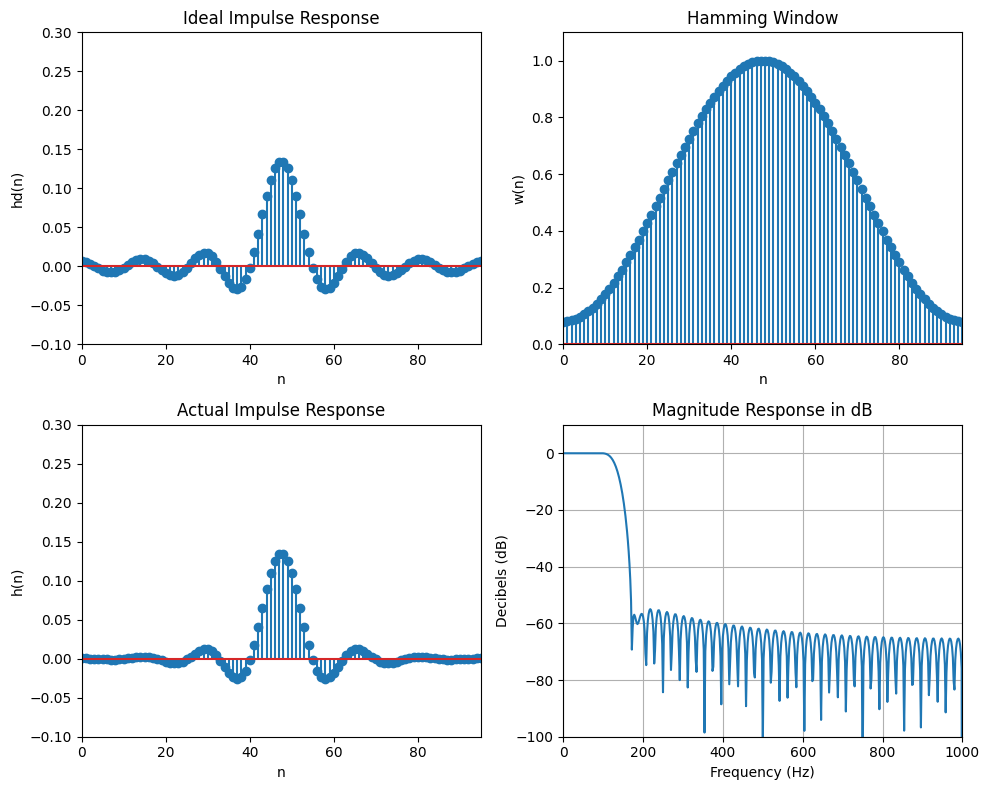

In [102]:
# Function to compute the ideal lowpass filter
def ideal_lp(wc, M):
    alpha = (M - 1) / 2  # Filter center point
    n = np.arange(0, M)  # Sample indices
    m = n - alpha + np.finfo(float).eps  # Avoid division by zero
    hd = np.sin(wc * m) / (np.pi * m)  # Ideal impulse response
    return hd

# Function to compute frequency response, phase, and group delay
def freqz_m(b, a):
    w, H = freqz(b, a, worN=1000, fs=2000, whole=True)  # Compute frequency response
    H = np.transpose(H[:501])  # Use first half (positive frequencies)
    w = np.transpose(w[:501])  # Frequency vector
    mag = np.abs(H)  # Magnitude of the frequency response
    db = 20 * np.log10((mag + np.finfo(float).eps) / np.max(mag))  # Convert to dB
    pha = np.angle(H)  # Phase response
    _, grd = group_delay((b, a), w=w[:501])  # Group delay
    return db, mag, pha, grd, w

# Specifications for the filter design
wp = 0.1 * np.pi  # Passband frequency
ws = 0.17 * np.pi  # Stopband frequency
tr_width = ws - wp  # Transition width
M = int(np.ceil(6.6 * np.pi / tr_width)) + 1  # Filter length
print('Filter Length (M) = %d' % M)

# Compute the ideal impulse response for the lowpass filter
n = np.arange(0, M)
wc = (ws + wp) / 2  # Cutoff frequency (midpoint of passband and stopband)
hd = ideal_lp(wc, M)  # Ideal lowpass filter

# Apply the Hamming window
w_ham = np.hamming(M)  # Hamming window coefficients
h = hd * w_ham  # Actual impulse response (windowed)

# Compute the frequency response, magnitude, phase, and group delay
db, mag, pha, grd, w = freqz_m(h, [1])

# Convert to index for ripple and attenuation calculations
delta_w = 2 * np.pi / 1000  # Frequency resolution
wp_idx = int(np.round(wp / delta_w))  # Index for passband frequency
ws_idx = int(np.round(ws / delta_w))  # Index for stopband frequency

# Calculate passband ripple (Rp) and stopband attenuation (As)
Rp = -np.min(db[:wp_idx + 1])  # Ripple in passband (dB)
As = -np.round(np.max(db[ws_idx:]))  # Attenuation in stopband (dB)
print("Passband Ripple = %.3f dB" % Rp)
print("Stopband Attenuation = %d dB" % As)

# Plot the results
plt.figure(figsize=(10, 8))  # Set the figure size

# Plot the ideal impulse response
plt.subplot(2, 2, 1)
plt.title("Ideal Impulse Response")
plt.xlabel('n')
plt.ylabel('hd(n)')
plt.axis([0, M - 1, -0.1, 0.3])
plt.stem(n, hd)

# Plot the Hamming window
plt.subplot(2, 2, 2)
plt.title("Hamming Window")
plt.xlabel('n')
plt.ylabel('w(n)')
plt.axis([0, M - 1, 0, 1.1])
plt.stem(n, w_ham)

# Plot the actual impulse response
plt.subplot(2, 2, 3)
plt.title("Actual Impulse Response")
plt.xlabel('n')
plt.ylabel('h(n)')
plt.axis([0, M - 1, -0.1, 0.3])
plt.stem(n, h)

# Plot the magnitude response in dB
plt.subplot(2, 2, 4)
plt.title("Magnitude Response in dB")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Decibels (dB)')
plt.axis([0, 2000 / 2, -100, 10])  # Set the axis limits
plt.grid()
plt.plot(w, db)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

## 3. Band-Pass Filter Design

Filter Length (M) = 135
Beta = 6.2600
Passband Ripple = 0.019 dB
Stopband Attenuation = 41 dB


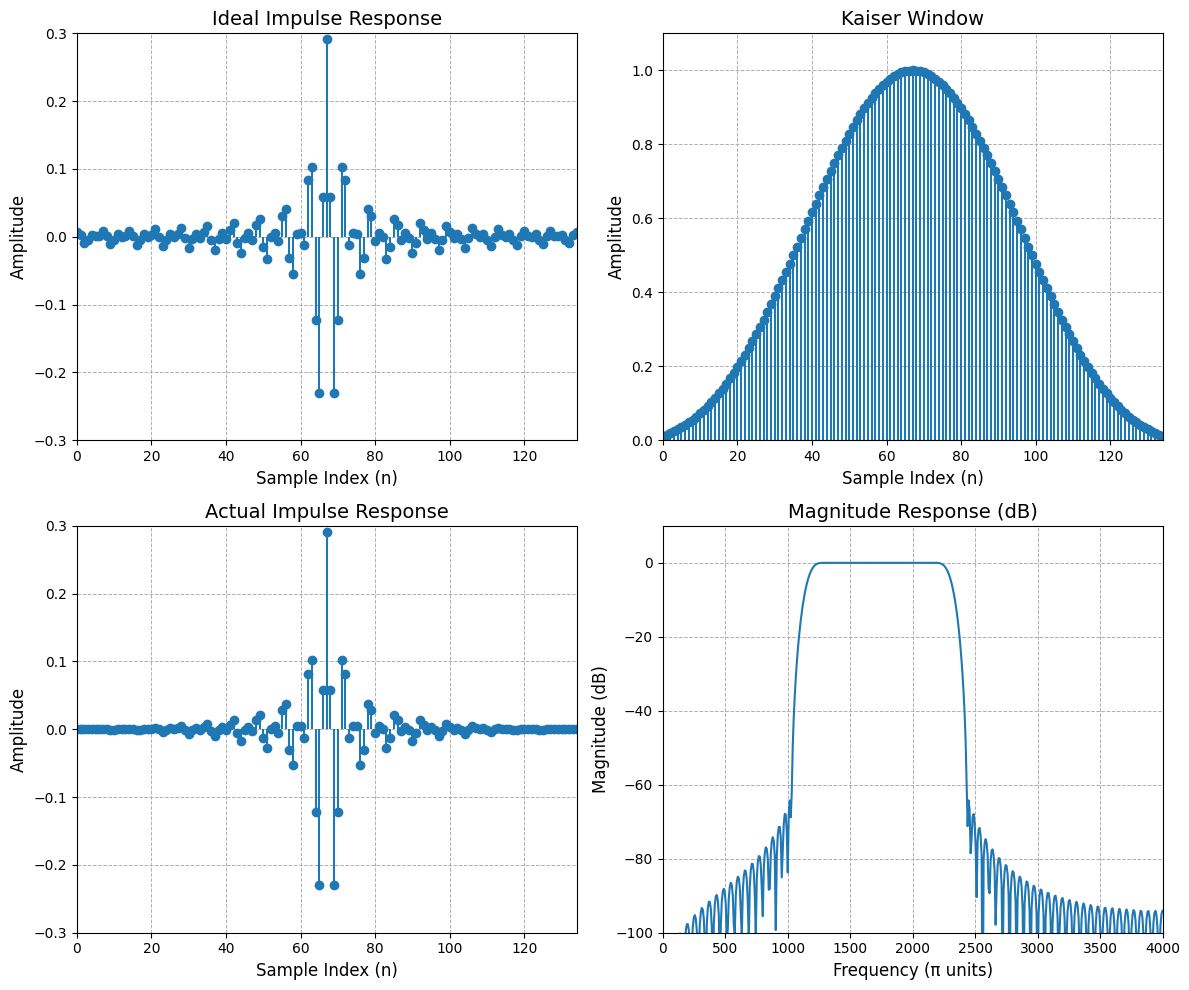

In [103]:
# Function to compute the ideal lowpass filter
def ideal_lp(wc, M):
    alpha = (M - 1) / 2  # Filter center point
    n = np.arange(0, M)  # Sample indices
    m = n - alpha + np.finfo(float).eps  # Avoid division by zero
    hd = np.sin(wc * m) / (np.pi * m)  # Ideal impulse response
    return hd

# Function to compute frequency response, phase, and group delay
def freqz_m(b, a):
    w, H = freqz(b, a, worN=1000, fs=8000, whole=True)  # Compute frequency response
    H = np.transpose(H[:501])  # Use first half (positive frequencies)
    w = np.transpose(w[:501])  # Frequency vector
    mag = np.abs(H)  # Magnitude of the frequency response
    db = 20 * np.log10((mag + np.finfo(float).eps) / np.max(mag))  # Convert to dB
    pha = np.angle(H)  # Phase response
    _, grd = group_delay((b, a), w=w[:501])  # Group delay
    return db, mag, pha, grd, w

# Bandpass filter specifications
ws1 = 0.25 * np.pi  # Lower stopband edge
wp1 = 0.325 * np.pi  # Lower passband edge
ws2 = 0.605 * np.pi  # Upper stopband edge
wp2 = 0.5525 * np.pi  # Upper passband edge
As = 40  # Stopband attenuation

# Calculate the transition width and filter length (M)
tr_width = min((wp1 - ws1), (ws2 - wp2))  # Minimum transition width
M = int(np.ceil(7 * np.pi / tr_width)) + 1  # Filter length based on specs
print("Filter Length (M) = %d" % M)

# Generate the ideal bandpass filter (difference of two lowpass filters)
n = np.arange(0, M)
wc1 = (ws1 + wp1) / 2  # Lower cutoff frequency
wc2 = (ws2 + wp2) / 2  # Upper cutoff frequency
hd = ideal_lp(wc2, M) - ideal_lp(wc1, M)  # Ideal bandpass filter impulse response

# Apply the Kaiser window
beta =  0.2 * (As - 8.7)
print('Beta = %.4f'%beta)

w_kai = np.kaiser(M, beta)  # Kaiser window coefficients
h = hd * w_kai  # Actual impulse response (windowed)

# Compute the frequency response, magnitude, phase, and group delay
db, mag, pha, grd, w = freqz_m(h, [1])

# Convert to index for ripple and attenuation calculations
delta_w = 2 * np.pi / 1000  # Frequency resolution
wp1_idx = int(np.round(wp1 / delta_w))  # Index for lower passband edge
ws1_idx = int(np.round(ws1 / delta_w))  # Index for lower stopband edge
wp2_idx = int(np.round(wp2 / delta_w))  # Index for upper passband edge
ws2_idx = int(np.round(ws2 / delta_w))  # Index for upper stopband edge

# Calculate passband ripple (Rp) and stopband attenuation (As)
Rp = -np.min(db[wp1_idx + 1: wp2_idx])  # Ripple in passband (dB)
As = -np.round(np.max(db[ws2_idx:]))  # Attenuation in stopband (dB)
print("Passband Ripple = %.3f dB" % Rp)
print("Stopband Attenuation = %d dB" % As)

# Plot the results with improved readability
plt.figure(figsize=(12, 10))  # Set the figure size

# Plot the ideal impulse response
plt.subplot(2, 2, 1)
plt.title("Ideal Impulse Response", fontsize=14)
plt.xlabel('Sample Index (n)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.axis([0, M - 1, -0.3, 0.3])
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.stem(n, hd, basefmt=" ")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot the Kaiser Window
plt.subplot(2, 2, 2)
plt.title("Kaiser Window", fontsize=14)
plt.xlabel('Sample Index (n)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.axis([0, M - 1, 0, 1.1])
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.stem(n, w_kai, basefmt=" ")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot the actual impulse response
plt.subplot(2, 2, 3)
plt.title("Actual Impulse Response", fontsize=14)
plt.xlabel('Sample Index (n)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.axis([0, M - 1, -0.3, 0.3])
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.stem(n, h, basefmt=" ")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot the magnitude response in dB
plt.subplot(2, 2, 4)
plt.title("Magnitude Response (dB)", fontsize=14)
plt.xlabel('Frequency (π units)', fontsize=12)
plt.ylabel('Magnitude (dB)', fontsize=12)
plt.axis([0, 8000 / 2, -100, 10])  # Adjust x-axis to pi units and dB range
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.plot(w, db, linewidth=1.5)  # Normalize frequency by π
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


## 4. Multi-Pass Band Filter


Length of this multi-pass filter is:  71
Beta = 2.3473
Stopband Attenuation = 0 dB
Ripple Passband = 76.130 dB


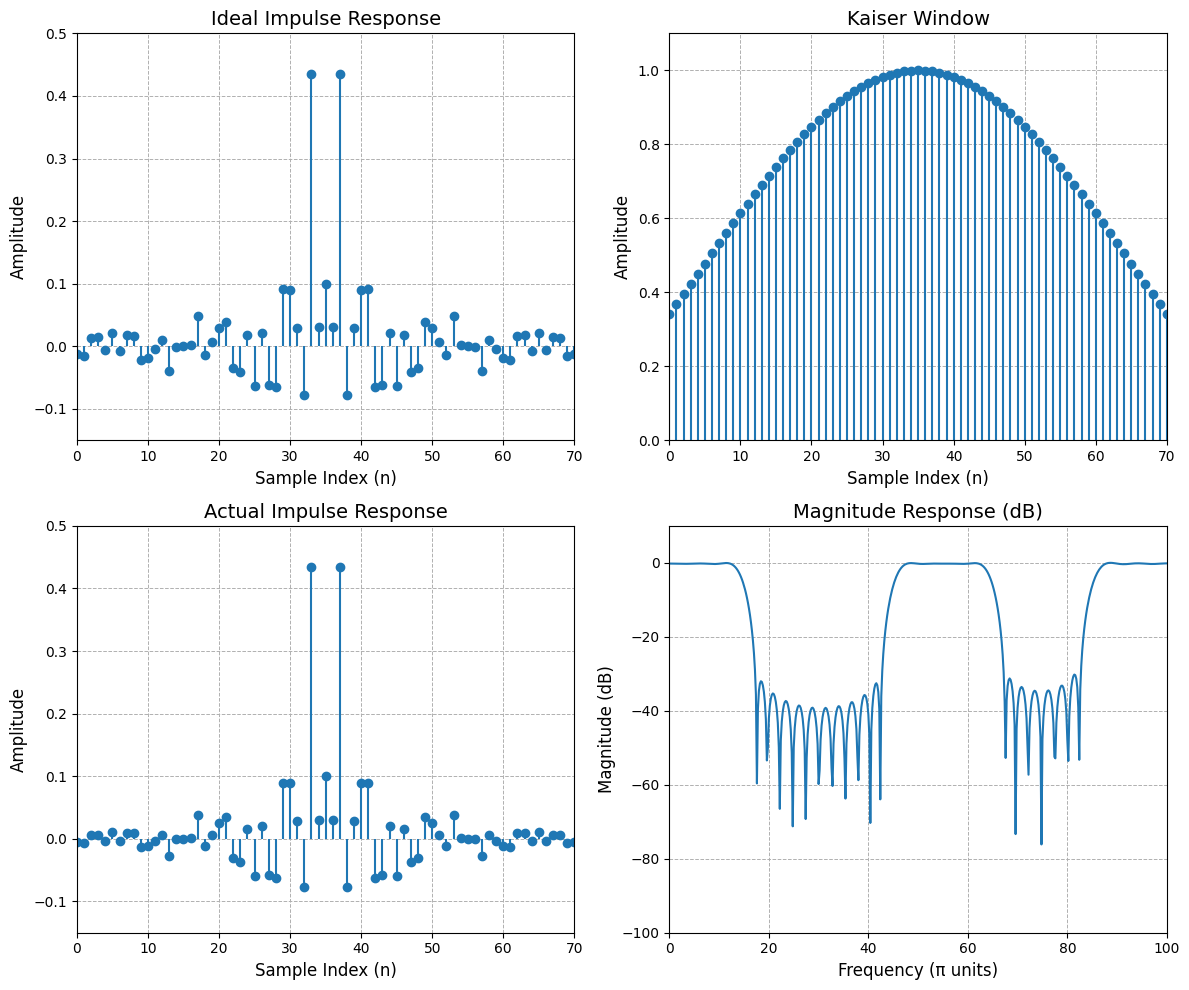

In [132]:
# Ideal lowpass filter function
def ideal_lp(wc, M):
    alpha = (M - 1) / 2  # Filter center point
    n = np.arange(0, M)  # Sample indices
    m = n - alpha + np.finfo(float).eps  # Avoid division by zero
    hd = np.sin(wc * m) / (np.pi * m)  # Ideal impulse response
    return hd

# Ideal highpass filter function using ideal lowpass filter
def ideal_hp(wc, M):
    lp = ideal_lp(wc, M)
    delta = np.zeros(M)
    delta[(M - 1) // 2] = 1  # Unit impulse at center
    hp = delta - lp  # Subtract from delta to create highpass
    return hp

# Frequency response function
def freqz_m(b, a):
    w, H = freqz(b, a, worN=1000, fs=200, whole=True)  # Frequency response
    H = np.transpose(H[:501])  # Use first half (positive frequencies)
    w = np.transpose(w[:501])  # Frequency vector
    mag = np.abs(H)  # Magnitude of the frequency response
    db = 20 * np.log10((mag + np.finfo(float).eps) / np.max(mag))  # Convert to dB
    pha = np.angle(H)  # Phase response
    _, grd = group_delay((b, a), w=w[:501])  # Group delay
    return db, mag, pha, grd, w

# Cutoff frequencies for multiple bands
wp1 = 0.2 * np.pi
ws1 = 0.1 * np.pi

wp2 = 0.4 * np.pi
ws2 = 0.5 * np.pi

wp3 = 0.7 * np.pi
ws3 = 0.6 * np.pi

wp4 = 0.8 * np.pi
ws4 = 0.9 * np.pi

# initialize the ripple and attenutation of stop and pass band
As = 30 # dB
Rp = 0.01 # dB

tr_width = min ((wp1 - ws1), (ws2 - wp2), (wp3 - ws3), (ws4 - wp4)) # normalize the transtition width
M = int(np.ceil(7 * np.pi / tr_width)) + 1 # calculate the length of the filter
print('Length of this multi-pass filter is: ', M)

n = np.arange(0, M)

#band pass filter
wc1 = (wp1 + ws1)/2
wc2 = (wp4 + ws4)/2
bp = ideal_lp(wc1, M) - ideal_lp(wc2, M)

wc3 = (wp3+ ws3)/2
hp = ideal_hp(wc3, M)

wc4 = (wp2 + ws2)/2
lp = ideal_lp(wc4, M)

hd = bp + hp + lp

beta =  0.1102 * (As - 8.7)
print('Beta = %.4f'%beta)

w_kai = np.kaiser(M, beta)  # Kaiser window coefficients
h = hd * w_kai  # Actual impulse response (windowed)

# Compute the frequency response, magnitude, phase, and group delay
db, mag, pha, grd, w = freqz_m(h, [1])

# Convert to index for ripple and attenuation calculations
# Recalculate frequency indices
delta_w = 2 * np.pi / 1000  # Frequency resolution
wp1_idx = int(np.round(wp1 / delta_w))  # Passband edge 1
ws1_idx = int(np.round(ws1 / delta_w))  # Stopband edge 1
wp2_idx = int(np.round(wp2 / delta_w))  # Passband edge 2
ws2_idx = int(np.round(ws2 / delta_w))  # Stopband edge 2
wp3_idx = int(np.round(wp3 / delta_w))  # Passband edge 3
ws3_idx = int(np.round(ws3 / delta_w))  # Stopband edge 3
wp4_idx = int(np.round(wp4 / delta_w))  # Passband edge 4
ws4_idx = int(np.round(ws4 / delta_w))  # Stopband edge 4


# Calculate Rp (Passband Ripple)
Rp = max(-np.min(db[wp1_idx:wp2_idx]), -np.min(db[wp3_idx:wp4_idx]))

# Calculate As (Stopband Attenuation)
As = -np.round(np.max(db[0:ws1_idx]))
print("Stopband Attenuation = %d dB" % As)
print("Ripple Passband = %.3f dB"%Rp)

# Plot the results with improved readability
plt.figure(figsize=(12, 10))  # Set the figure size

# Plot the ideal impulse response
plt.subplot(2, 2, 1)
plt.title("Ideal Impulse Response", fontsize=14)
plt.xlabel('Sample Index (n)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.axis([0, M - 1, -0.15, 0.5])
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.stem(n, hd, basefmt=" ")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot the Kaiser Window
plt.subplot(2, 2, 2)
plt.title("Kaiser Window", fontsize=14)
plt.xlabel('Sample Index (n)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.axis([0, M - 1, 0, 1.1])
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.stem(n, w_kai, basefmt=" ")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot the actual impulse response
plt.subplot(2, 2, 3)
plt.title("Actual Impulse Response", fontsize=14)
plt.xlabel('Sample Index (n)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.axis([0, M - 1, -0.15, 0.5])
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.stem(n, h, basefmt=" ")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot the magnitude response in dB
plt.subplot(2, 2, 4)
plt.title("Magnitude Response (dB)", fontsize=14)
plt.xlabel('Frequency (π units)', fontsize=12)
plt.ylabel('Magnitude (dB)', fontsize=12)
plt.axis([0, 200 / 2, -100, 10])  # Adjust x-axis to pi units and dB range
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.plot(w, db, linewidth=1.5)  # Normalize frequency by π
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


## 5. Low-Pass Filter Using Frequency Sampling

### 5.1. Designing the hr Type & Frequency Response

In [105]:
def hr_tipe1(h):
    """
    Computes the frequency response of a Type 1 FIR filter.

    Type 1 FIR filters have an even length (M) and symmetry, so their 
    impulse response is reflected and scaled to form the frequency 
    response using cosine terms.

    Parameters:
    h : array-like
        Impulse response of the FIR filter.
    
    Returns:
    hr : array
        Frequency response of the filter.
    w : array
        Frequency vector ranging from 0 to pi.
    a : array
        Reflected and scaled impulse response.
    L : int
        Index of the center of the impulse response.
    """
    M = len(h)
    L = (M - 1) // 2
    a = np.concatenate((np.array([h[L]]), 2*np.array(h[L-1::-1])))
    n = np.arange(0, L + 1)
    w = np.linspace(0, np.pi, 501)
    hr = np.cos(np.outer(w,n)) @ a.transpose()
    return hr, w, a, L

def hr_tipe2(h):
    """
    Computes the frequency response of a Type 2 FIR filter.

    Type 2 FIR filters have an odd length (M) and symmetry, so their
    impulse response is reflected and scaled to form the frequency
    response using cosine terms with a half-sample shift.

    Parameters:
    h : array-like
        Impulse response of the FIR filter.
    
    Returns:
    hr : array
        Frequency response of the filter.
    w : array
        Frequency vector ranging from 0 to pi.
    b : array
        Reflected and scaled impulse response.
    L : int
        Half the length of the impulse response.
    """
    M = len(h)
    L = M // 2
    b = 2*np.array(h[L-1::-1])
    n = np.arange(1, L + 1) - 0.5
    w = np.linspace(0, np.pi, 501)
    hr = np.cos(np.outer(w,n)) @ b.transpose()
    return hr, w, b, L

def hr_tipe3(h):
    """
    Computes the frequency response of a Type 3 FIR filter.

    Type 3 FIR filters have an even length (M) with odd symmetry, so 
    their frequency response is computed using sine terms.

    Parameters:
    h : array-like
        Impulse response of the FIR filter.
    
    Returns:
    hr : array
        Frequency response of the filter.
    w : array
        Frequency vector ranging from 0 to pi.
    c : array
        Reflected and scaled impulse response.
    L : int
        Index of the center of the impulse response.
    """
    M = len(h)
    L = (M-1)//2
    c = 2 * np.array(h[L::-1])
    n = np.arange(0, L + 1)
    w = np.linspace(0, np.pi, 501)
    hr = np.sin(np.outer(w,n)) @ c.transpose()
    return hr, w, c, L

def hr_tipe4(h):
    """
    Computes the frequency response of a Type 4 FIR filter.

    Type 4 FIR filters have an odd length (M) with odd symmetry, and
    their frequency response is computed using sine terms with a 
    half-sample shift.

    Parameters:
    h : array-like
        Impulse response of the FIR filter.
    
    Returns:
    hr : array
        Frequency response of the filter.
    w : array
        Frequency vector ranging from 0 to pi.
    d : array
        Reflected and scaled impulse response.
    L : int
        Half the length of the impulse response.
    """
    M = len(h)
    L = M // 2
    d = 2 * np.array(h[L-1::-1])
    n = np.arange(1, L + 1) - 0.5
    w = np.linspace(0, np.pi, 501)
    hr = np.sin(np.outer(w,n)) @ d.transpose()
    return hr, w, d, L

def freqz_m(b, a):
    """
    Computes the frequency response of a digital filter based on its coefficients.

    Uses the filter coefficients (numerator and denominator) to calculate the
    frequency response including magnitude, phase, and group delay. The function
    focuses on the positive frequencies from 0 to pi.

    Parameters:
    b : array-like
        Numerator coefficients of the filter.
    a : array-like
        Denominator coefficients of the filter.
    
    Returns:
    db : array
        Magnitude response in decibels (dB).
    mag : array
        Magnitude response.
    pha : array
        Phase response.
    grd : array
        Group delay.
    w : array
        Frequency vector ranging from 0 to pi.
    """
    w, H = freqz(b, a, worN=1000, whole=True)  # Frequency response
    H = np.transpose(H[:501])  # Use first half (positive frequencies)
    w = np.transpose(w[:501])  # Frequency vector
    mag = np.abs(H)  # Magnitude of the frequency response
    db = 20 * np.log10((mag + np.finfo(float).eps) / np.max(mag))  # Convert to dB
    pha = np.angle(H)  # Phase response
    _, grd = group_delay((b, a), w=w[:501])  # Group delay
    return db, mag, pha, grd, w


### 5.2. Low-Pass using Naive Frequency Sampling

C:\Users\arief\AppData\Local\Temp\ipykernel_25980\4058742955.py:152: UserWarning: The filter's denominator is extremely small at frequencies [1.885, 2.199, 2.513, 2.827, 3.142],             around which a singularity may be present
  _, grd = group_delay((b, a), w=w[:501])  # Group delay


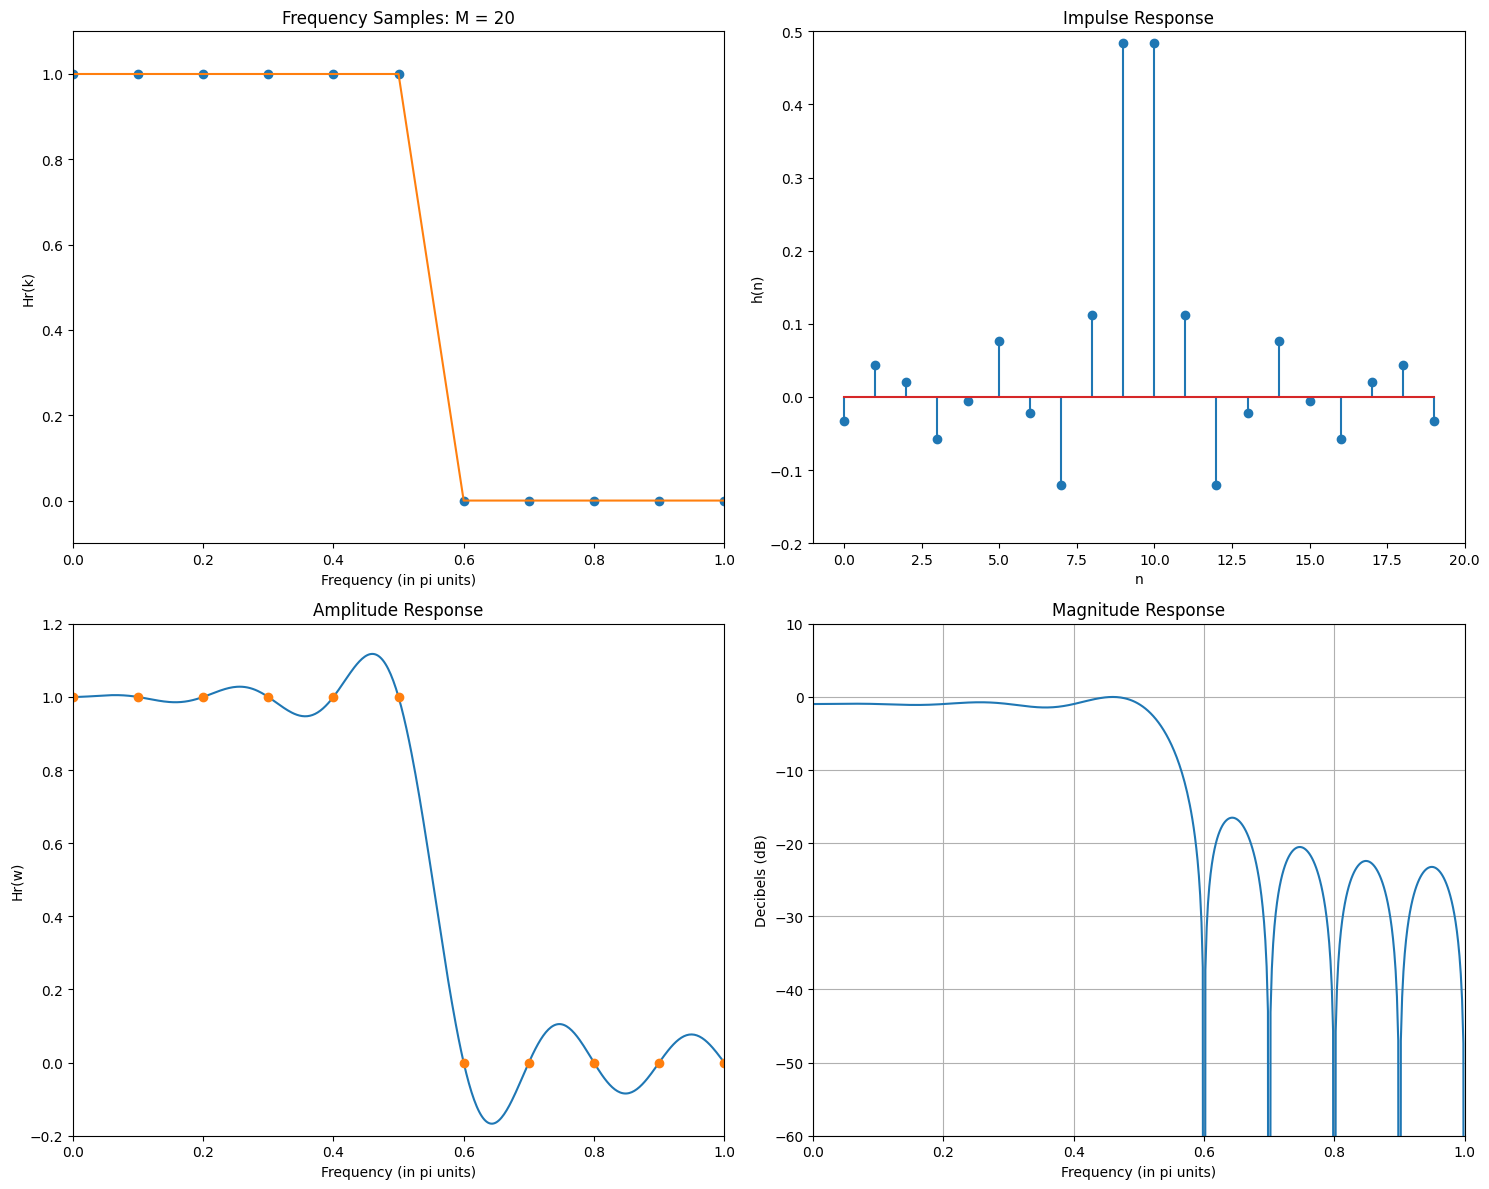

In [106]:
# Define parameters
M = 20
alpha = (M - 1) / 2  # Alpha is half of M-1
l = np.arange(0, M)  # Array from 0 to M-1
wl = (2 * np.pi / M) * l  # Frequency samples

# Define desired frequency response Hrs
Hrs = np.array([*np.ones(6), *np.zeros(9), *np.ones(5)])  # Amplitude response
Hdr = np.array([1, 1, 0, 0])  # Magnitude response specification
wdl = np.array([0, 0.5, 0.6, 1])  # Normalized frequency

# Indices for the DFT symmetric and anti-symmetric parts
k1 = np.arange(0, np.floor((M - 1) / 2) + 1, dtype=int)  # Lower half
k2 = np.arange(np.floor((M - 1) / 2) + 1, M, dtype=int)   # Upper half

# Construct phase response
angH = np.concatenate((
    -alpha * (2 * np.pi / M) * k1,               # Negative phase for k1
    alpha * (2 * np.pi / M) * (M - k2)           # Positive phase for k2
))

# Frequency response H(k) = Hrs * e^(j*angH)
H = Hrs * np.exp(1j * angH)

# Compute impulse response by taking the IFFT
h = np.real(np.fft.ifft(H, M))

# Frequency response calculation (assume freqz_m and hr_tipe2 are user-defined functions)
db, mag, pha, grd, w = freqz_m(h, [1])  # Magnitude, phase, etc.
hr, w, b, L = hr_tipe2(h)               # Type II FIR filter response

# Plotting results
plt.figure(figsize=(15, 12))

# Frequency Samples plot
plt.subplot(2, 2, 1)
plt.title("Frequency Samples: M = 20")
plt.xlabel('Frequency (in pi units)')
plt.ylabel('Hr(k)')
plt.axis([0, 1, -0.1, 1.1])
plt.plot(wl[:11] / np.pi, Hrs[:11], "o")  # Plot Hrs samples
plt.plot(wdl, Hdr)  # Plot desired response Hdr

# Impulse Response plot
plt.subplot(2, 2, 2)
plt.title("Impulse Response")
plt.xlabel('n')
plt.ylabel('h(n)')
plt.axis([-1, M, -0.2, 0.5])
plt.stem(l, h)

# Amplitude Response plot
plt.subplot(2, 2, 3)
plt.title("Amplitude Response")
plt.xlabel('Frequency (in pi units)')
plt.ylabel('Hr(w)')
plt.axis([0, 1, -0.2, 1.2])
plt.plot(w / np.pi, hr)  # Amplitude response
plt.plot(wl[:11] / np.pi, Hrs[:11], 'o')  # Plot Hrs samples

# Magnitude Response plot (in decibels)
plt.subplot(2, 2, 4)
plt.title("Magnitude Response")
plt.xlabel('Frequency (in pi units)')
plt.ylabel('Decibels (dB)')
plt.axis([0, 1, -60, 10])
plt.grid()
plt.plot(w / np.pi, db)  # Plot magnitude response in dB

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### 5.2. High-Pass using Naive Frequency Sampling

C:\Users\arief\AppData\Local\Temp\ipykernel_25980\4058742955.py:152: UserWarning: The filter's denominator is extremely small at frequencies [0.000, 0.314, 0.628, 0.942, 1.257, 1.571],             around which a singularity may be present
  _, grd = group_delay((b, a), w=w[:501])  # Group delay


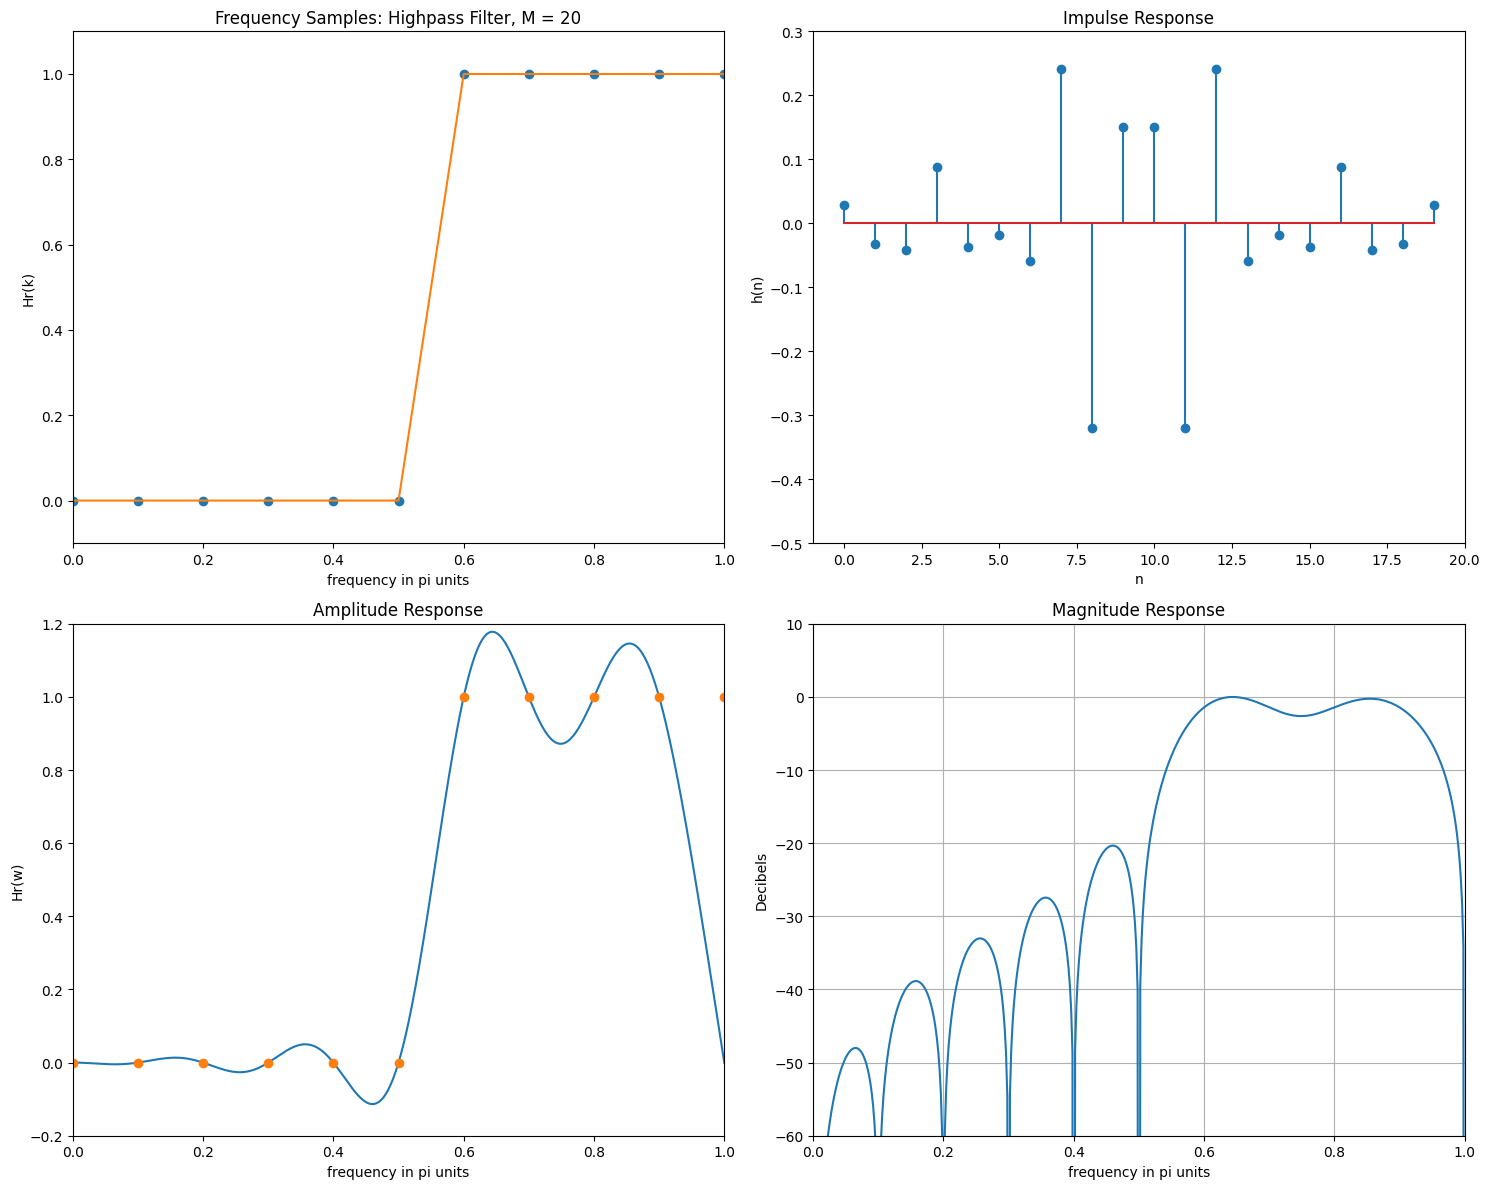

In [107]:
M = 20  # Filter length (number of points)
alpha = (M-1)/2  # Center point of the filter
l = np.arange(0, M)  # Array of sample indices
wl = (2*np.pi/M)*l  # Frequency vector in radians

# Define the desired frequency response for a highpass filter
# Set low frequencies (up to index 5) to 0 (stopband), high frequencies (index 15 onward) to 1 (passband)
Hrs = np.array([*np.zeros(6), *np.ones(9), *np.zeros(5)])  # Highpass frequency response

# Desired response points in the passband and stopband
Hdr = np.array([0, 0, 1, 1])  # 0 for stopband, 1 for passband
wdl = np.array([0, 0.5, 0.6, 1])  # Normalized frequencies for stopband and passband

# Indices for first and second halves of the filter
k1 = np.arange(0, np.floor((M - 1) / 2) + 1, dtype=int)  # First half indices
k2 = np.arange(np.floor((M - 1) / 2) + 1, M, dtype=int)  # Second half indices

# Compute the phase response for the filter
angH = np.concatenate((-alpha * (2 * np.pi) / M * k1, alpha * (2 * np.pi) / M * (M - k2)))

# Compute the full frequency response by multiplying Hrs by complex exponential (adds phase component)
H = Hrs * np.exp(1j * angH)

# Get the time-domain impulse response by taking the inverse FFT of the frequency response
h = np.real(np.fft.ifft(H, M))

# Compute the frequency response (magnitude, phase, group delay)
db, mag, pha, grd, w = freqz_m(h, [1])

# Compute Type 2 frequency response for the highpass filter (since we have even length and symmetry)
hr, w, b, L = hr_tipe2(h)

# Plotting the results
plt.figure(figsize=(15,12))

# Subplot 1: Frequency Samples (showing Hrs with actual points in the frequency domain)
plt.subplot(2,2,1)
plt.title("Frequency Samples: Highpass Filter, M = 20")
plt.xlabel('frequency in pi units')
plt.ylabel('Hr(k)')
plt.axis([0, 1, -0.1, 1.1])
plt.plot(wl[:11]/np.pi, Hrs[:11], "o")  # Plotting frequency samples
plt.plot(wdl, Hdr)  # Plotting desired response

# Subplot 2: Impulse Response (in time domain)
plt.subplot(2,2,2)
plt.title("Impulse Response")
plt.xlabel('n')
plt.ylabel('h(n)')
plt.axis([-1, M, -0.5, 0.3])
plt.stem(l, h)  # Stem plot for impulse response

# Subplot 3: Amplitude Response (showing actual amplitude response against ideal highpass design)
plt.subplot(2,2,3)
plt.title("Amplitude Response")
plt.xlabel('frequency in pi units')
plt.ylabel('Hr(w)')
plt.axis([0, 1, -0.2, 1.2])
plt.plot(w/np.pi, hr)  # Plotting computed amplitude response from hr_tipe2
plt.plot(wl[:11]/np.pi, Hrs[:11], 'o')  # Overlaying frequency sample points

# Subplot 4: Magnitude Response (in decibels)
plt.subplot(2,2,4)
plt.title("Magnitude Response")
plt.xlabel('frequency in pi units')
plt.ylabel('Decibels')
plt.axis([0, 1, -60, 10])
plt.grid()
plt.plot(w/np.pi, db)  # Plotting magnitude response in dB

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
